## Prepare the workstation

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

!pip install openpyxl
!pip install cryptography
!pip install msoffcrypto-tool

import msoffcrypto
import io

#### Decrypt the excel file

In [2]:
# Decrypt Excel file to open it in Python.
file_name = "kite_orders_data.xlsx"
sheet_name = "Order Details"
password = "FRMay23"

with open(file_name, "rb") as file:
    decryptor = msoffcrypto.OfficeFile(file)
    decryptor.load_key(password=password)
    decrypted_data = io.BytesIO()
    decryptor.decrypt(decrypted_data)
    decrypted_data.seek(0)

    orders_details = pd.read_excel(decrypted_data, sheet_name=sheet_name, engine='openpyxl')

#### View the data

In [3]:
orders_details.head()

,OrderID,PartNumber,Description,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit
0,2275137,CDW241818M,Double wall boxes - 24x18x18 inches (610x457x4...,1,52.44,20,20.98,20.98,140,0.009683
1,2275137,CSW090606M-P30,Single wall cardboard boxes - 9x6x6 inches (22...,1,7.20,30,2.11,2.11,3600,0.000435
2,2275137,CSW120909M,Single wall cardboard boxes - 12x9x9 inches (3...,1,10.38,30,5.04,5.04,1800,0.000910
3,2275137,CSW120906M-P30,Single wall cardboard boxes - 12x9x6 inches (3...,1,8.08,25,3.65,3.65,2100,0.000911
4,2275137,CDW181212M,Double wall boxes - 18x12x12 inches (457x305x3...,1,24.95,20,9.02,9.02,560,0.004687


In [4]:
orders_details.shape

(60818, 10)

#### Explore the data

In [5]:
# Check for any missing values. 
orders_details.isna().sum()

OrderID              0
PartNumber           0
Description          0
Packs                0
PackPrice            0
UnitsPerPack         0
PackWeight           0
LineWeight         134
PalletQuantity       0
CubicMPerUnit     3182
dtype: int64

In [6]:
# Check for duplicates.
duplicates = orders_details.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 10


In [7]:
# View the duplicates.
duplicate_rows = orders_details[duplicates]
print(duplicate_rows)

       OrderID          PartNumber  \
4599   2277059           CDW201212   
8807   2278762          CDW241818M   
18432  2282608           CSW141414   
32640  2288357           CDW181824   
38370  2290632          CDW161616M   
40124  2291347  TPW048066A-1C-L-P1   
40245  2291403  TPW048066A-1C-L-P1   
55277  2297249           CDW101010   
58908  2298728          CDW161616M   
59828  2299116                 AK5   

                                             Description  Packs  PackPrice  \
4599   Double wall boxes - 20x12x12 inches (508x305x3...      5      20.86   
8807   Double wall boxes - 24x18x18 inches (610x457x4...      1      41.12   
18432  Single wall cardboard boxes - 14x14x14 inches ...      3      22.62   
32640  Double wall boxes - 18x18x24 inches (457x457x6...      1      20.69   
38370  Double wall boxes - 16x16x16 inches (406x406x4...      1      28.10   
40124  Custom printed tape 48mm x 66m - white acrylic...      1     190.80   
40245  Custom printed tape 48mm x 6

The ten duplicates were cross checked agains the 'Orders' data set. For the duplicated rows, the total value of the order was looked at relative to the components in the 'Orders Details'. This revealed that there were no 'true' duplicates in the data, with those rows showing identical products both existing within an order. 

In [8]:
# Explore the metadata.
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60818 entries, 0 to 60817
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         60818 non-null  int64  
 1   PartNumber      60818 non-null  object 
 2   Description     60818 non-null  object 
 3   Packs           60818 non-null  int64  
 4   PackPrice       60818 non-null  float64
 5   UnitsPerPack    60818 non-null  int64  
 6   PackWeight      60818 non-null  float64
 7   LineWeight      60684 non-null  float64
 8   PalletQuantity  60818 non-null  int64  
 9   CubicMPerUnit   57636 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 4.6+ MB


In [9]:
# Print the descriptive statistics.
orders_details.describe()

,OrderID,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit
count,6.081800e+04,60818.000000,60818.000000,60818.000000,60818.000000,60684.000000,6.081800e+04,57636.000000
mean,2.287397e+06,6.147983,27.634708,84.603144,6.629667,29.862601,2.314166e+04,0.032742
std,7.015417e+03,45.072311,76.533757,230.386829,20.126841,87.795549,9.483581e+04,0.109412
min,2.275137e+06,1.000000,0.000000,1.000000,0.000000,0.010000,0.000000e+00,0.000000
25%,2.281361e+06,1.000000,10.140000,6.000000,1.850000,3.920000,2.250000e+02,0.000352
50%,2.287444e+06,2.000000,18.410000,20.000000,4.500000,9.500000,1.200000e+03,0.001062
75%,2.293487e+06,5.000000,30.660000,50.000000,8.750000,23.700000,3.780000e+03,0.005580
max,2.299521e+06,6200.000000,4995.000000,10350.000000,759.000000,5308.800000,1.350000e+06,1.921920


#### Replace null values in LineWeight column. 

In [10]:
# Replace 134 null values in LineWeight column.
# Based on multiplication of Packs and PackWeight. 

# Define a function to calculate the value based on 'Packs and PackWeight. 
def calculate_value(row):
    if pd.isnull(row['LineWeight']):
        return row['Packs'] * row['PackWeight']
    else:
        return row['LineWeight']

# Apply the function to update the null values in LineWeight
orders_details['LineWeight'] = orders_details.apply(calculate_value, axis=1)

In [11]:
# Check null values in LineWeight have been replaced. 
orders_details.isna().sum()

OrderID              0
PartNumber           0
Description          0
Packs                0
PackPrice            0
UnitsPerPack         0
PackWeight           0
LineWeight           0
PalletQuantity       0
CubicMPerUnit     3182
dtype: int64

#### Delete rows where PalletQuantity is zero. 

In [12]:
# Decision made to remove rows (n=875) where PalletQuantity = 0.
# These are mainly sample or custom products. 
# Further calculations on orders and truck sizes will be based on pallet. 

orders_details = orders_details.drop(orders_details[orders_details['PalletQuantity'] == 0].index)

orders_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 0 to 60817
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         59943 non-null  int64  
 1   PartNumber      59943 non-null  object 
 2   Description     59943 non-null  object 
 3   Packs           59943 non-null  int64  
 4   PackPrice       59943 non-null  float64
 5   UnitsPerPack    59943 non-null  int64  
 6   PackWeight      59943 non-null  float64
 7   LineWeight      59943 non-null  float64
 8   PalletQuantity  59943 non-null  int64  
 9   CubicMPerUnit   56818 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 5.0+ MB


In [13]:
orders_details.head()

,OrderID,PartNumber,Description,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit
0,2275137,CDW241818M,Double wall boxes - 24x18x18 inches (610x457x4...,1,52.44,20,20.98,20.98,140,0.009683
1,2275137,CSW090606M-P30,Single wall cardboard boxes - 9x6x6 inches (22...,1,7.20,30,2.11,2.11,3600,0.000435
2,2275137,CSW120909M,Single wall cardboard boxes - 12x9x9 inches (3...,1,10.38,30,5.04,5.04,1800,0.000910
3,2275137,CSW120906M-P30,Single wall cardboard boxes - 12x9x6 inches (3...,1,8.08,25,3.65,3.65,2100,0.000911
4,2275137,CDW181212M,Double wall boxes - 18x12x12 inches (457x305x3...,1,24.95,20,9.02,9.02,560,0.004687


In [14]:
# Check remaining null values. 
orders_details.isna().sum()

OrderID              0
PartNumber           0
Description          0
Packs                0
PackPrice            0
UnitsPerPack         0
PackWeight           0
LineWeight           0
PalletQuantity       0
CubicMPerUnit     3125
dtype: int64

#### Replace null values in CubicMPerUnit column.

In [15]:
# Replace n=3,125 Null values in CubicMPerUnit column. 
# Based on calculation that 1 UK pallet  = 2.64m3
# PalletQuantity = units needed to fill 1 pallet.
# CubicMPerUnit = (1 pallet/palletquantity) * 2.64. 

orders_details.loc[orders_details['CubicMPerUnit'].isnull(), 'CubicMPerUnit'] = 1 / orders_details['PalletQuantity'] * 2.64

orders_details.head()

,OrderID,PartNumber,Description,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit
0,2275137,CDW241818M,Double wall boxes - 24x18x18 inches (610x457x4...,1,52.44,20,20.98,20.98,140,0.009683
1,2275137,CSW090606M-P30,Single wall cardboard boxes - 9x6x6 inches (22...,1,7.20,30,2.11,2.11,3600,0.000435
2,2275137,CSW120909M,Single wall cardboard boxes - 12x9x9 inches (3...,1,10.38,30,5.04,5.04,1800,0.000910
3,2275137,CSW120906M-P30,Single wall cardboard boxes - 12x9x6 inches (3...,1,8.08,25,3.65,3.65,2100,0.000911
4,2275137,CDW181212M,Double wall boxes - 18x12x12 inches (457x305x3...,1,24.95,20,9.02,9.02,560,0.004687


In [16]:
# Check null values have been replaced. 
orders_details.isna().sum()

OrderID           0
PartNumber        0
Description       0
Packs             0
PackPrice         0
UnitsPerPack      0
PackWeight        0
LineWeight        0
PalletQuantity    0
CubicMPerUnit     0
dtype: int64

In [17]:
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59943 entries, 0 to 60817
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         59943 non-null  int64  
 1   PartNumber      59943 non-null  object 
 2   Description     59943 non-null  object 
 3   Packs           59943 non-null  int64  
 4   PackPrice       59943 non-null  float64
 5   UnitsPerPack    59943 non-null  int64  
 6   PackWeight      59943 non-null  float64
 7   LineWeight      59943 non-null  float64
 8   PalletQuantity  59943 non-null  int64  
 9   CubicMPerUnit   59943 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 7.0+ MB


#### Add a new Pallet_per_line column. 

In [18]:
# Add a new Pallet_per_line column based on a calculation. 
# Calculates total pallets needed for the product line and not for 1 unit. 

orders_details['Pallet_per_line'] = (orders_details['Packs'] 
                                        * orders_details['UnitsPerPack']) / orders_details['PalletQuantity']

orders_details.head()

,OrderID,PartNumber,Description,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit,Pallet_per_line
0,2275137,CDW241818M,Double wall boxes - 24x18x18 inches (610x457x4...,1,52.44,20,20.98,20.98,140,0.009683,0.142857
1,2275137,CSW090606M-P30,Single wall cardboard boxes - 9x6x6 inches (22...,1,7.20,30,2.11,2.11,3600,0.000435,0.008333
2,2275137,CSW120909M,Single wall cardboard boxes - 12x9x9 inches (3...,1,10.38,30,5.04,5.04,1800,0.000910,0.016667
3,2275137,CSW120906M-P30,Single wall cardboard boxes - 12x9x6 inches (3...,1,8.08,25,3.65,3.65,2100,0.000911,0.011905
4,2275137,CDW181212M,Double wall boxes - 18x12x12 inches (457x305x3...,1,24.95,20,9.02,9.02,560,0.004687,0.035714


#### Add a new Volume_per_line(m3) column. 

In [19]:
# Add a new volume_per_line(m3) column based on a calculation. 
# Calculates the cubic m3 for the entire product line and not for 1 unit. 

orders_details['Volume_per_line_m3'] = orders_details['Packs'] * orders_details['UnitsPerPack'] * orders_details['CubicMPerUnit']

orders_details.head()

,OrderID,PartNumber,Description,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit,Pallet_per_line,Volume_per_line_m3
0,2275137,CDW241818M,Double wall boxes - 24x18x18 inches (610x457x4...,1,52.44,20,20.98,20.98,140,0.009683,0.142857,0.193660
1,2275137,CSW090606M-P30,Single wall cardboard boxes - 9x6x6 inches (22...,1,7.20,30,2.11,2.11,3600,0.000435,0.008333,0.013050
2,2275137,CSW120909M,Single wall cardboard boxes - 12x9x9 inches (3...,1,10.38,30,5.04,5.04,1800,0.000910,0.016667,0.027300
3,2275137,CSW120906M-P30,Single wall cardboard boxes - 12x9x6 inches (3...,1,8.08,25,3.65,3.65,2100,0.000911,0.011905,0.022775
4,2275137,CDW181212M,Double wall boxes - 18x12x12 inches (457x305x3...,1,24.95,20,9.02,9.02,560,0.004687,0.035714,0.093740


In [20]:
# Check descriptive statistics of the numerical columns.
# Potential outliers based on the 75% and max values. 
orders_details.describe()

,OrderID,Packs,PackPrice,UnitsPerPack,PackWeight,LineWeight,PalletQuantity,CubicMPerUnit,Pallet_per_line,Volume_per_line_m3
count,5.994300e+04,59943.000000,59943.000000,59943.000000,59943.000000,59943.000000,5.994300e+04,59943.000000,59943.000000,59943.000000
mean,2.287393e+06,5.766895,28.001103,85.731945,6.721441,30.113368,2.347947e+04,0.032297,0.194059,0.294247
std,7.009919e+03,17.770857,76.958218,231.774048,20.258651,87.868764,9.548396e+04,0.117514,0.909095,2.122432
min,2.275137e+06,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000001,0.000000
25%,2.281374e+06,1.000000,10.380000,6.000000,2.000000,4.000000,2.400000e+02,0.000364,0.015152,0.021450
50%,2.287442e+06,2.000000,18.760000,24.000000,4.620000,9.600000,1.300000e+03,0.000916,0.046875,0.060700
75%,2.293476e+06,5.000000,30.840000,50.000000,9.000000,24.000000,3.780000e+03,0.005437,0.142857,0.209100
max,2.299521e+06,1200.000000,4995.000000,10350.000000,759.000000,5308.800000,1.350000e+06,2.640000,180.000000,475.200000


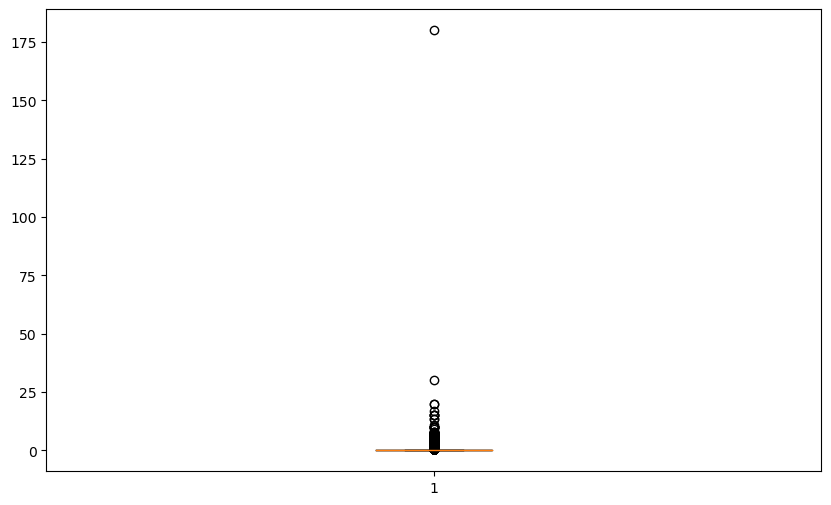

In [21]:
# View outliers for Pallet_per_line. 
# Descriptive statistics identifies other columns with potential outliers based on 75% and max values.
# However, Pallet_per_product will be mainly used for this analysis. 
# Outliers in other columns not seen as an issue. 

# Create a boxplot to visualise the outliers. 
plt.figure(figsize=(10, 6))
plt.boxplot(orders_details['Pallet_per_line'])

# Display the plot
plt.show()

# One significant outlier identified. 

In [22]:
# Determine the biggest outlier. 
q1 = orders_details['Pallet_per_line'].quantile(0.25)
q3 = orders_details['Pallet_per_line'].quantile(0.75)

# Calculate the IQR
iqr = q3 - q1

# Calculate the upper threshold
upper_threshold = q3 + iqr

# Identify the highest outlier
highest_outlier = orders_details['Pallet_per_line'][orders_details['Pallet_per_line'] > upper_threshold].max()

# Display the highest outlier
print("Highest outlier for 'Pallet_per_line':", highest_outlier)

# Significiant outlier (180) will be removed. 

Highest outlier for 'Pallet_per_line': 180.0


#### Remove outlier from Pallet_per_line.  

In [23]:
# Remove outlier from Pallet_per_line with value of 180. 
orders_details = orders_details.drop(orders_details[orders_details['Pallet_per_line'] == 180].index)

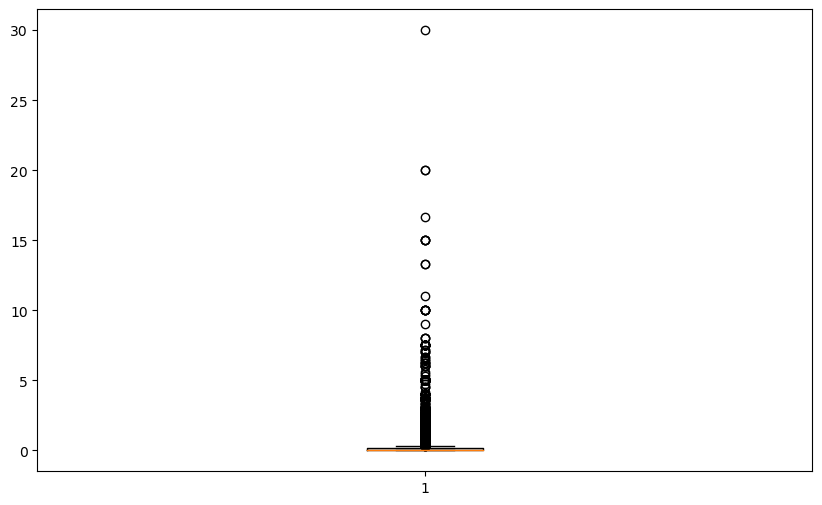

In [24]:
# Create a boxplot with outlier removed. 
plt.figure(figsize=(10, 6))
plt.boxplot(orders_details['Pallet_per_line'])

# Display the plot
plt.show()

In [25]:
# Check metadata. 
orders_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59942 entries, 0 to 60817
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   OrderID             59942 non-null  int64  
 1   PartNumber          59942 non-null  object 
 2   Description         59942 non-null  object 
 3   Packs               59942 non-null  int64  
 4   PackPrice           59942 non-null  float64
 5   UnitsPerPack        59942 non-null  int64  
 6   PackWeight          59942 non-null  float64
 7   LineWeight          59942 non-null  float64
 8   PalletQuantity      59942 non-null  int64  
 9   CubicMPerUnit       59942 non-null  float64
 10  Pallet_per_line     59942 non-null  float64
 11  Volume_per_line_m3  59942 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 5.9+ MB


#### Rename columns. 

In [26]:
orders_details.rename(columns={'PartNumber': 'Part_number', 'PackPrice': 'Price_per_pack', 
                               'UnitsPerPack': 'Units_per_pack', 'PackWeight': 'Weight_per_pack',
                               'LineWeight': 'Weight_per_line', 'PalletQuantity': 'Units_per_pallet',
                               'CubicMPerUnit': 'Volume_per_unit'}, inplace=True)

orders_details.head()

,OrderID,Part_number,Description,Packs,Price_per_pack,Units_per_pack,Weight_per_pack,Weight_per_line,Units_per_pallet,Volume_per_unit,Pallet_per_line,Volume_per_line_m3
0,2275137,CDW241818M,Double wall boxes - 24x18x18 inches (610x457x4...,1,52.44,20,20.98,20.98,140,0.009683,0.142857,0.193660
1,2275137,CSW090606M-P30,Single wall cardboard boxes - 9x6x6 inches (22...,1,7.20,30,2.11,2.11,3600,0.000435,0.008333,0.013050
2,2275137,CSW120909M,Single wall cardboard boxes - 12x9x9 inches (3...,1,10.38,30,5.04,5.04,1800,0.000910,0.016667,0.027300
3,2275137,CSW120906M-P30,Single wall cardboard boxes - 12x9x6 inches (3...,1,8.08,25,3.65,3.65,2100,0.000911,0.011905,0.022775
4,2275137,CDW181212M,Double wall boxes - 18x12x12 inches (457x305x3...,1,24.95,20,9.02,9.02,560,0.004687,0.035714,0.093740


#### Create CSV file. 

In [28]:
orders_details.to_csv('orderdetails_clean.csv')